In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import warnings


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'shap'

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/tidaldatathon/student_data.csv')



In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
#dealing with categorical features through encoding or by dropping non-important variables (deemed non-important through analyzing feature importance)

schooldict = {'GP': 0, 'MS': 1}
sexdict = {'F':0, 'M':1}
addressdict = {'U':0, 'R':1}
famsizedict = {'LE3': 0, 'GT3': 1}
pstatusdict = {'T': 0, 'A': 1}
yesnodict = {'yes': 0, 'no': 1}

for i in ['Mjob', 'Fjob', 'reason', 'guardian']:
  df = df.drop(i,axis=1)

for i in [schooldict,sexdict,addressdict,famsizedict,pstatusdict,yesnodict]:
  df = df.replace(i)


In [ ]:
df['help'] = np.where(df['G3'] >= 14, 0, 1)

In [ ]:
df = df.drop("G3", axis=1)

In [ ]:
y = df['help']

X = df.drop("help", axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model_gb = lgb.LGBMClassifier(boosting_type='gbdt')
model_gb.fit(X_train, y_train)

model_rf = lgb.LGBMClassifier(boosting_type='rf', bagging_fraction=0.8, feature_fraction=0.8)
model_rf.fit(X_train, y_train)

model_drt = lgb.LGBMClassifier(boosting_type='dart')
model_drt.fit(X_train, y_train)




[LightGBM] [Info] Number of positive: 242, number of negative: 74
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 316, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.765823 -> initscore=1.184873
[LightGBM] [Info] Start training from score 1.184873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier(boosting_type='dart')

In [ ]:
y_pred_gb = model_gb.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_drt = model_drt.predict(X_test)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [ ]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
norm_conf_matrix_gb = confusion_matrix(y_test,y_pred_gb,normalize='true')

accuracy_gb

0.9620253164556962

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
norm_conf_matrix_rf = confusion_matrix(y_test,y_pred_rf,normalize='true')

accuracy_rf

0.9367088607594937

In [ ]:
accuracy_drt = accuracy_score(y_test, y_pred_drt)

conf_matrix_drt = confusion_matrix(y_test, y_pred_drt)
norm_conf_matrix_drt = confusion_matrix(y_test,y_pred_drt,normalize='true')

accuracy_drt

0.9746835443037974

<function matplotlib.pyplot.show(close=None, block=None)>

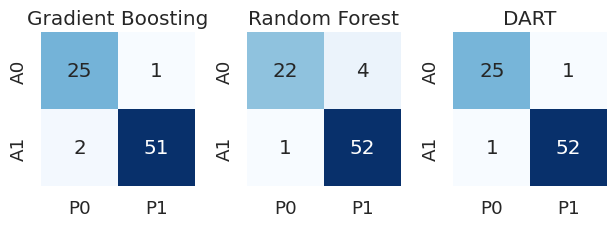

In [ ]:
sns.set(font_scale=1.2)

plt.subplot(1,3,1)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])

# Add labels and a title

plt.title('Gradient Boosting')

plt.subplot(1,3,2)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])

# Add labels and a title

plt.title('Random Forest')

plt.subplot(1,3,3)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_drt, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])

# Add labels and a title

plt.title('DART')

plt.tight_layout()
plt.show

<Axes: title={'center': 'DART'}, xlabel='Feature importance', ylabel='Features'>

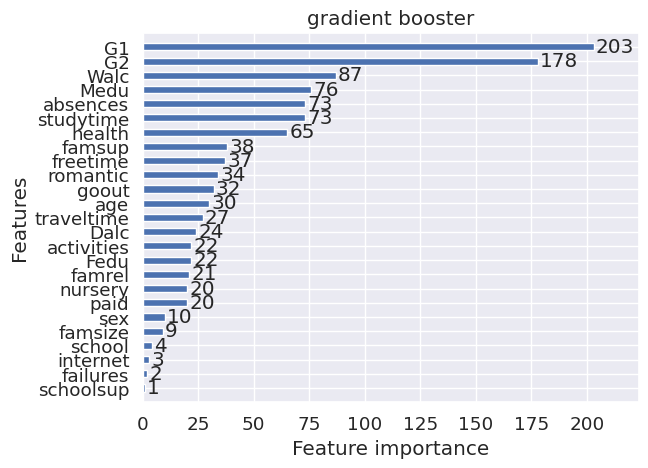

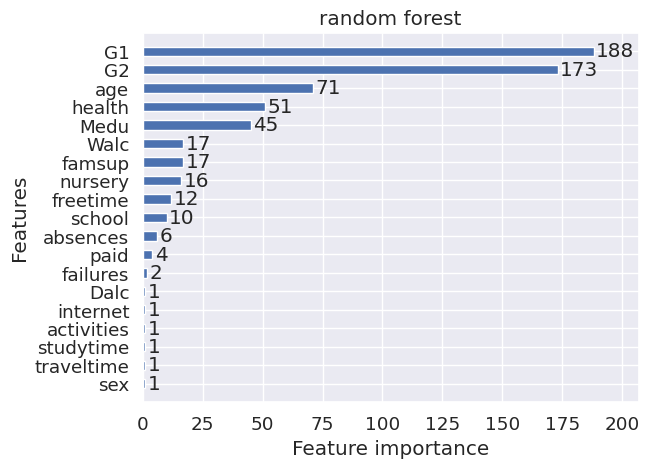

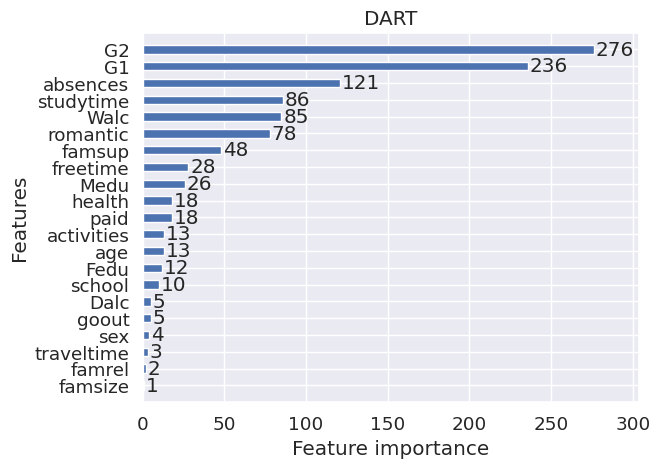

In [ ]:
lgb.plot_importance(model_gb, height = 0.5, title = "gradient booster")
lgb.plot_importance(model_rf, height = 0.5, title="random forest")
lgb.plot_importance(model_drt, height = 0.5, title='DART')

In [ ]:
explainer_new_gb = shap.Explainer(model_gb, X)
new_shap_values_gb = explainer_new_gb(X)



In [ ]:
explainer_new_rf = shap.Explainer(model_rf, X)
new_shap_values_rf = explainer_new_rf(X)

In [ ]:
explainer_new_drt = shap.Explainer(model_drt, X)
new_shap_values_drt = explainer_new_drt(X)

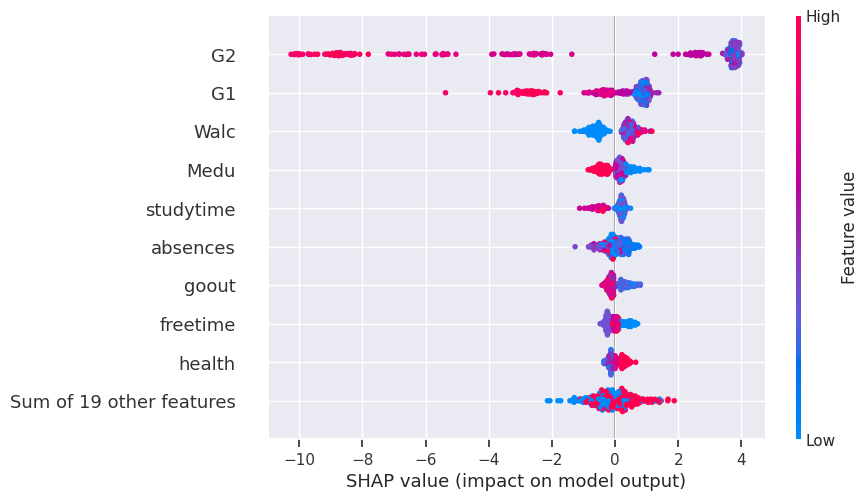

In [ ]:
shap.plots.beeswarm(new_shap_values_gb)

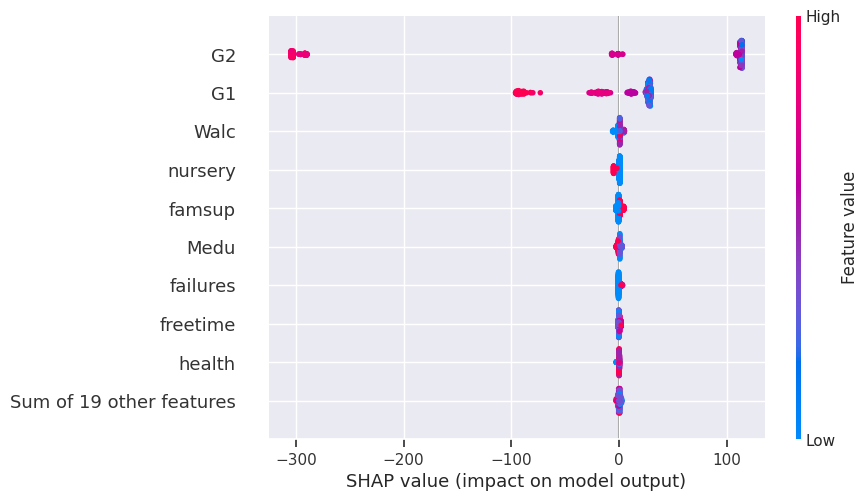

In [ ]:
shap.plots.beeswarm(new_shap_values_rf)

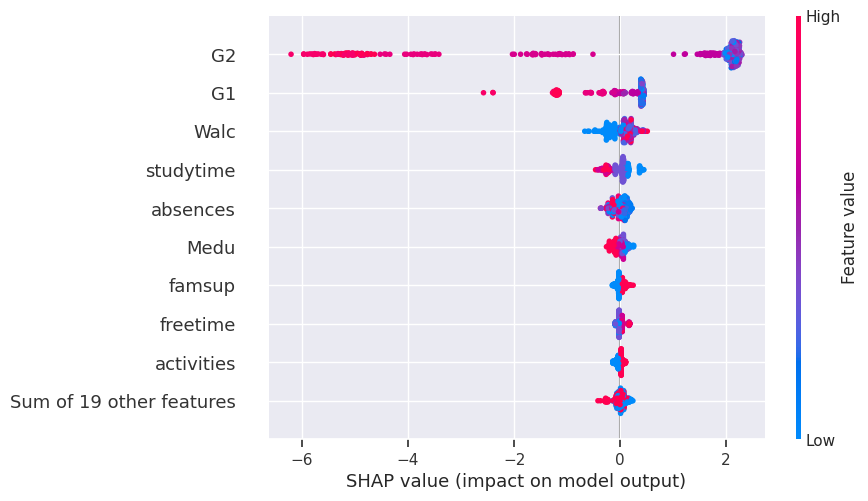

DART


In [ ]:
shap.plots.beeswarm(new_shap_values_drt)
print("DART")

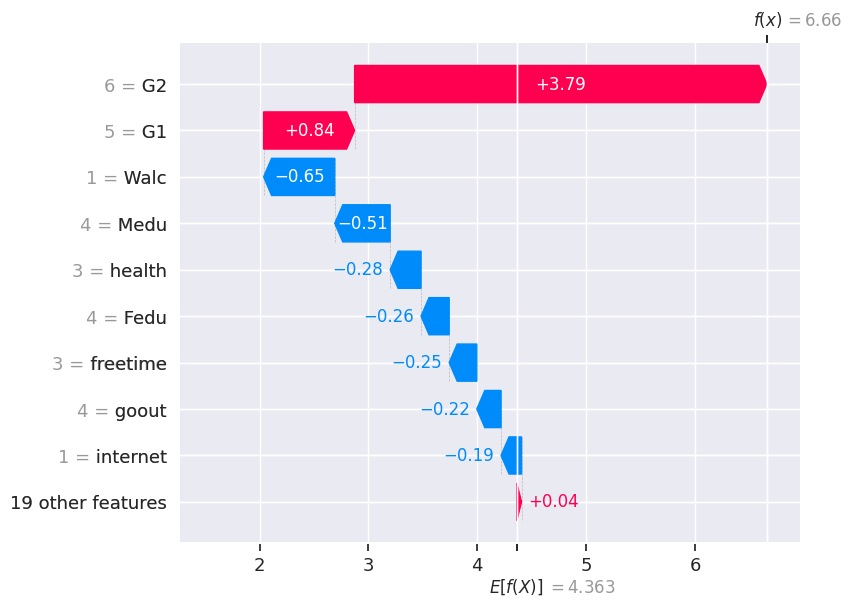

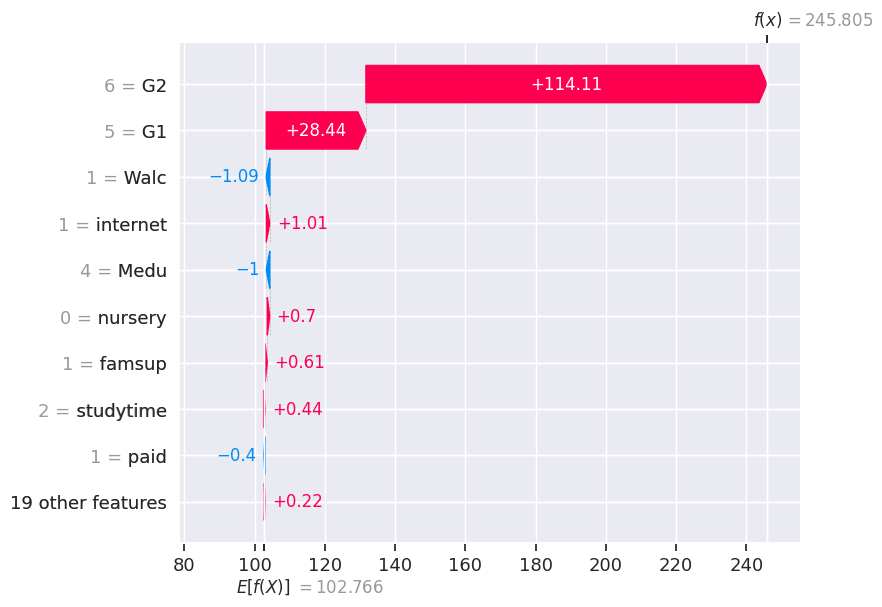

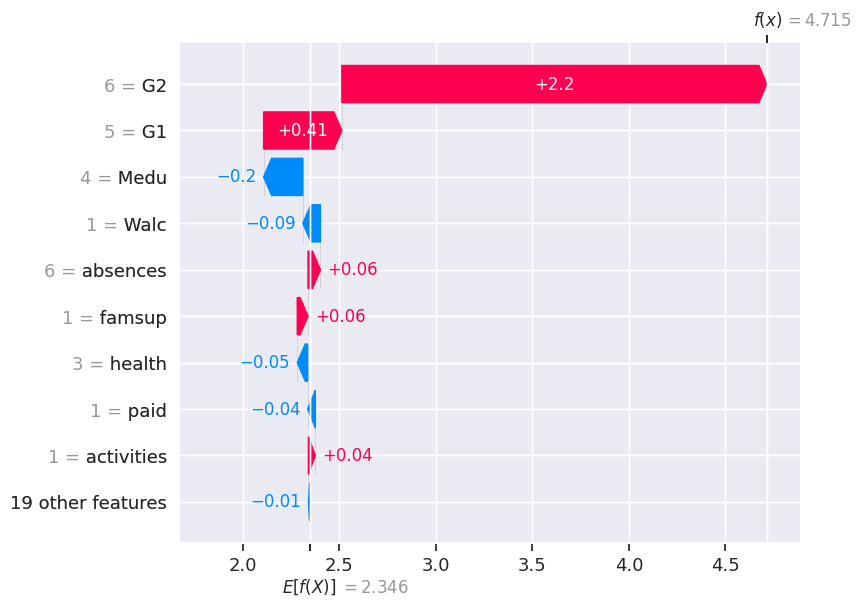

In [ ]:
shap.plots.waterfall(new_shap_values_gb[0])
shap.plots.waterfall(new_shap_values_rf[0])
shap.plots.waterfall(new_shap_values_drt[0])